#Обработка на податоците со FinBert модел за сентимент анализа

In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import drive
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from transformers import pipeline
from tqdm import tqdm
from transformers import AutoTokenizer

In [ ]:
pip install transformers torch pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Претпроцесирање на податоците

In [ ]:
articles_df = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/clean_articles4.csv')

In [ ]:
articles_df

,URL,Title,Text
0,https://newstalk870.am/ixp/134/p/fbi-warns-nor...,FBI Warns WA: 8 Different Northwest Attacks on...,Now that the power grid attack in North Caroli...
1,https://www.dawn.com/news/1721169/pm-formed-bo...,PM-formed body asks censors to review Joyland,"ISLAMABAD: The fate of Pakistan’s Oscar entry,..."
2,https://tulsaworld.com/opinion/columnists/ginn...,Ginnie Graham: Getting love lessons from a 50-...,"Fifty years ago, The Tulsa Tribune published a..."
3,https://www.theguardian.com/books/2022/dec/10/...,We Are Not One review: assured history of Isra...,The civil war divided America’s Christians alo...
4,https://www.tuscaloosanews.com/story/news/crim...,Grisly details emerge as suspect in Prattville...,PRATTVILLE — Two 17-year-old Prattville girls ...
...,...,...,...
789,https://www.kitv.com/news/crime/honolulu-polic...,Honolulu Police investigating attempted murder...,You have permission to edit this article.\n\nE...
790,https://economictimes.indiatimes.com/news/indi...,Indo-Pak ties witness new low in 2022; FM Bila...,Stories you might be interested in
791,https://www.dawn.com/news/1716040/physical-rem...,Physical remand of Ayaz Amir’s ex-wife in Sara...,ISLAMABAD: The judicial magistrate of Shahzad ...
792,https://pakobserver.net/pfa-checks-adulteration/,PFA checks adulteration,Punjab Food Authority (PFA) visited different ...


In [ ]:
data_cleaned = articles_df.drop_duplicates(subset=['Title'])
data_cleaned = data_cleaned.drop_duplicates(subset=['Text'])

In [ ]:
data_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
data_cleaned

,URL,Title,Text
0,https://newstalk870.am/ixp/134/p/fbi-warns-nor...,FBI Warns WA: 8 Different Northwest Attacks on...,Now that the power grid attack in North Caroli...
1,https://www.dawn.com/news/1721169/pm-formed-bo...,PM-formed body asks censors to review Joyland,"ISLAMABAD: The fate of Pakistan’s Oscar entry,..."
2,https://tulsaworld.com/opinion/columnists/ginn...,Ginnie Graham: Getting love lessons from a 50-...,"Fifty years ago, The Tulsa Tribune published a..."
3,https://www.theguardian.com/books/2022/dec/10/...,We Are Not One review: assured history of Isra...,The civil war divided America’s Christians alo...
4,https://www.tuscaloosanews.com/story/news/crim...,Grisly details emerge as suspect in Prattville...,PRATTVILLE — Two 17-year-old Prattville girls ...
...,...,...,...
736,https://www.thehollywoodgossip.com/2022/10/how...,"Howard Stern Eviscerates Kanye West ""Mental Il...","Reading Time: 5 minutes\n\nSometimes, even the..."
737,https://article.wn.com/view/2022/10/06/Kidnapp...,Kidnapped California family found dead,Answer for your question of the article will b...
738,https://economictimes.indiatimes.com/news/indi...,Indo-Pak ties witness new low in 2022; FM Bila...,Stories you might be interested in
739,https://www.dawn.com/news/1716040/physical-rem...,Physical remand of Ayaz Amir’s ex-wife in Sara...,ISLAMABAD: The judicial magistrate of Shahzad ...


# Имплементација на FinBert

In [ ]:
finbert = pipeline("text-classification", model="ProsusAI/finbert")

Device set to use cpu


In [ ]:
tqdm.pandas()

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

In [ ]:
def split_text(text, max_tokens=490):
    tokens = tokenizer.tokenize(text)
    chunks = [tokens[i:i+max_tokens] for i in range(0, len(tokens), max_tokens)]
    return [tokenizer.convert_tokens_to_string(chunk) for chunk in chunks]

data_cleaned["news_text"] = data_cleaned["Text"].apply(lambda x: split_text(x) if len(tokenizer.tokenize(x)) > 512 else [x])

In [ ]:
tqdm.pandas()

def safe_sentiment_analysis(text):
    try:
        return finbert(text)[0]["label"]
    except Exception as e:
        print(f"Error processing text: {text[:50]}... - {e}")
        return "ERROR"

data_cleaned["sentiment"] = data_cleaned["news_text"].progress_apply(safe_sentiment_analysis)

100%|██████████| 741/741 [42:25<00:00,  3.43s/it]


In [ ]:
#data_cleaned["sentiment"] = data_cleaned["news_text"].progress_apply(lambda x: finbert(x)[0]["label"])

  9%|▉         | 66/751 [04:01<41:41,  3.65s/it]


KeyboardInterrupt: 

In [ ]:
data_cleaned.to_csv('/content/drive/MyDrive/DIPLOMSKA/SENTIMENT/sentiment_dataset4.csv', index=False)

## Анализа на податоците од моделот

In [ ]:
data_cleaned

,URL,Title,Text,news_text,sentiment
0,https://newstalk870.am/ixp/134/p/fbi-warns-nor...,FBI Warns WA: 8 Different Northwest Attacks on...,Now that the power grid attack in North Caroli...,[now that the power grid attack in north carol...,negative
1,https://www.dawn.com/news/1721169/pm-formed-bo...,PM-formed body asks censors to review Joyland,"ISLAMABAD: The fate of Pakistan’s Oscar entry,...",[ISLAMABAD: The fate of Pakistan’s Oscar entry...,negative
2,https://tulsaworld.com/opinion/columnists/ginn...,Ginnie Graham: Getting love lessons from a 50-...,"Fifty years ago, The Tulsa Tribune published a...","[fifty years ago, the tulsa tribune published ...",neutral
3,https://www.theguardian.com/books/2022/dec/10/...,We Are Not One review: assured history of Isra...,The civil war divided America’s Christians alo...,[the civil war divided america ’ s christians ...,neutral
4,https://www.tuscaloosanews.com/story/news/crim...,Grisly details emerge as suspect in Prattville...,PRATTVILLE — Two 17-year-old Prattville girls ...,[prattville — two 17 - year - old prattville g...,negative
...,...,...,...,...,...
736,https://www.thehollywoodgossip.com/2022/10/how...,"Howard Stern Eviscerates Kanye West ""Mental Il...","Reading Time: 5 minutes\n\nSometimes, even the...","[reading time : 5 minutes sometimes, even the ...",negative
737,https://article.wn.com/view/2022/10/06/Kidnapp...,Kidnapped California family found dead,Answer for your question of the article will b...,[Answer for your question of the article will ...,neutral
738,https://economictimes.indiatimes.com/news/indi...,Indo-Pak ties witness new low in 2022; FM Bila...,Stories you might be interested in,[Stories you might be interested in],neutral
739,https://www.dawn.com/news/1716040/physical-rem...,Physical remand of Ayaz Amir’s ex-wife in Sara...,ISLAMABAD: The judicial magistrate of Shahzad ...,[ISLAMABAD: The judicial magistrate of Shahzad...,neutral


In [ ]:
data_cleaned["sentiment"]

,sentiment
0,neutral
1,negative
2,negative
3,negative
4,neutral
...,...
613,neutral
614,negative
615,neutral
616,neutral


In [ ]:
sentiment_stats = data_cleaned['sentiment'].value_counts()
sentiment_percentage = data_cleaned['sentiment'].value_counts(normalize=True) * 100

print("Sentiment Statistics:")
print(sentiment_stats)
print(sentiment_percentage)

Sentiment Statistics:
sentiment
neutral     391
negative    340
positive     10
Name: count, dtype: int64
sentiment
neutral     52.766532
negative    45.883941
positive     1.349528
Name: proportion, dtype: float64


<ipython-input-19-43b27de466db>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data_cleaned, palette='Set2')


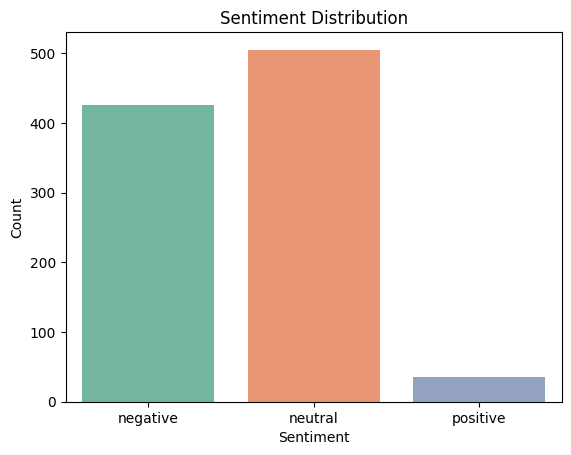

In [ ]:
sns.countplot(x='sentiment', data=data_cleaned, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()